# Characterization of ALPACA's modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Preparation
First we read the membership file from ALPACA, the two networks, and we prepare the data

In [93]:
# Output directory
import os
outputDir = "../results/alpaca-batch-coad-subtype-connnectivity-20250317/"
if not os.path.exists(outputDir):
    os.makedirs(outputDir)
# ALPACA membership file
membership_fn = "../data/processed/alpaca-batch-coad-subtype-20240510/membership_csm2_csm4.csv"
# Read membership
membership = pd.read_csv(membership_fn)
membership.head()


,node,module,modularity
0,ALX1_A,1,0.0061
1,ALX3_A,2,0.011
2,ALX4_A,1,0.0052
3,AR_A,2,0.0014
4,ARGFX_A,2,0.012


In [6]:
# clean membership table splitting node into node_name and node_type
membership['node_name'] = membership.node.str.split('_').str[0]
membership['node_type'] = membership.node.str.split('_').str[1]
membership.head()


,node,module,modularity,node_name,node_type
0,ALX1_A,1,0.006097,ALX1,A
1,ALX3_A,2,0.011064,ALX3,A
2,ALX4_A,1,0.005248,ALX4,A
3,AR_A,2,0.001445,AR,A
4,ARGFX_A,2,0.012254,ARGFX,A


## Analysis of PANDA connectivity

Here, using the modules identified by ALPACA, we check the differences in connectivity between the two subtypes

In [8]:
# read the two networks
cms2_net = pd.read_csv("../data/processed/batch-coad-subtype-20240510/tcga_coad_cms2/analysis/panda/panda_tcga_coad_cms2.txt", sep=" ", index_col=0)
cms4_net = pd.read_csv("../data/processed/batch-coad-subtype-20240510/tcga_coad_cms4/analysis/panda/panda_tcga_coad_cms4.txt", sep=" ", index_col=0)

### Prepare an edge membership table

In [9]:
# melt the dataframe and keep the index
cms2_long = cms2_net.melt(ignore_index = False, var_name = 'gene', value_name='cms2').reset_index()
cms4_long = cms4_net.melt(ignore_index = False, var_name = 'gene', value_name='cms4').reset_index()

In [10]:
# Get the two nets
nets = cms2_long.merge(cms4_long, on =['tf','gene'], how = 'inner')
nets.shape

(19590053, 4)

In [11]:
nets.head()

,tf,gene,cms2,cms4
0,ALX1,ENSG00000000003,1.639950,0.701865
1,ALX3,ENSG00000000003,0.463252,0.087116
2,ALX4,ENSG00000000003,1.347992,0.552226
3,AR,ENSG00000000003,-0.986745,-0.862890
4,ARGFX,ENSG00000000003,0.887296,0.290060


In [12]:
# In this table we report each edge (tf-gene) , the CMS2 and CMS4 values and the membership of the gene and the tf
edge_membership = nets.merge(membership, left_on='gene', right_on='node_name', how = 'left')
edge_membership = edge_membership.merge(membership, left_on='tf', right_on='node_name', how = 'left', suffixes=('_gene', '_tf'))
edge_membership.head()

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A


In [13]:
# For each edge, check if TF-gene are in the same module
edge_membership['same_module'] = edge_membership.module_gene == edge_membership.module_tf
edge_membership['edge_module'] = edge_membership['same_module'].astype(int) * edge_membership['module_gene'].astype(int)
edge_membership

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf,same_module,edge_module
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A,False,0
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A,False,0
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A,False,0
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A,False,0
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590048,ZSCAN4,ENSG00000284594,-0.292792,-0.106729,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN4_A,2,0.002642,ZSCAN4,A,True,2
19590049,ZSCAN5,ENSG00000284594,0.836854,0.792892,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5_A,4,0.002277,ZSCAN5,A,False,0
19590050,ZSCAN5C,ENSG00000284594,-0.752496,-0.782719,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,False,0
19590051,ZSCAN9,ENSG00000284594,-1.703456,-1.760072,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN9_A,1,0.002776,ZSCAN9,A,False,0


In [14]:
# Compute the edge difference and absolute edge difference
edge_membership['diff_edge'] = edge_membership['cms2'] - edge_membership['cms4']
edge_membership['diff_edge_abs'] = abs(edge_membership['diff_edge'])
edge_membership

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf,same_module,edge_module,diff_edge,diff_edge_abs
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A,False,0,0.938085,0.938085
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A,False,0,0.376136,0.376136
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A,False,0,0.795765,0.795765
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A,False,0,-0.123855,0.123855
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A,False,0,0.597237,0.597237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590048,ZSCAN4,ENSG00000284594,-0.292792,-0.106729,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN4_A,2,0.002642,ZSCAN4,A,True,2,-0.186063,0.186063
19590049,ZSCAN5,ENSG00000284594,0.836854,0.792892,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5_A,4,0.002277,ZSCAN5,A,False,0,0.043963,0.043963
19590050,ZSCAN5C,ENSG00000284594,-0.752496,-0.782719,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,False,0,0.030223,0.030223
19590051,ZSCAN9,ENSG00000284594,-1.703456,-1.760072,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN9_A,1,0.002776,ZSCAN9,A,False,0,0.056616,0.056616


In [15]:
# We add an indicator to count the edges
edge_membership['is_edge'] = 1
edge_membership

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf,same_module,edge_module,diff_edge,diff_edge_abs,is_edge
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A,False,0,0.938085,0.938085,1
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A,False,0,0.376136,0.376136,1
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A,False,0,0.795765,0.795765,1
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A,False,0,-0.123855,0.123855,1
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A,False,0,0.597237,0.597237,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590048,ZSCAN4,ENSG00000284594,-0.292792,-0.106729,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN4_A,2,0.002642,ZSCAN4,A,True,2,-0.186063,0.186063,1
19590049,ZSCAN5,ENSG00000284594,0.836854,0.792892,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5_A,4,0.002277,ZSCAN5,A,False,0,0.043963,0.043963,1
19590050,ZSCAN5C,ENSG00000284594,-0.752496,-0.782719,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,False,0,0.030223,0.030223,1
19590051,ZSCAN9,ENSG00000284594,-1.703456,-1.760072,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN9_A,1,0.002776,ZSCAN9,A,False,0,0.056616,0.056616,1


In [65]:
# We compute the IN- and OUT-module degrees
same_module_degrees = (edge_membership[edge_membership['same_module'] == True]).loc[:,['gene','module_gene','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['gene','module_gene']).sum().reset_index()
same_module_degrees['same_module'] = True
diff_module_degrees = (edge_membership[edge_membership['same_module'] == False]).loc[:,['gene','module_gene','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['gene','module_gene']).sum().reset_index()
diff_module_degrees['same_module'] = False
module_degrees = pd.concat([same_module_degrees, diff_module_degrees], axis=0)
module_degrees.sort_values('gene')

,gene,module_gene,cms2,cms4,diff_edge,diff_edge_abs,is_edge,same_module
0,ENSG00000000003,7,15,19,-3.5,5.9,20,True
0,ENSG00000000003,7,-9.6,-99,90,3.5e+02,977,False
1,ENSG00000000005,2,-1.8e+02,-1.9e+02,7.3,83,754,False
1,ENSG00000000005,2,20,-8.1,28,29,243,True
2,ENSG00000000419,2,2e+02,2e+02,-4,13,243,True
...,...,...,...,...,...,...,...,...
19618,ENSG00000284564,1,1e+02,2e+02,-94,95,251,True
19619,ENSG00000284570,1,3.3e+02,3.8e+02,-50,51,251,True
19647,ENSG00000284570,1,-4.1e+02,-4.9e+02,76,1.5e+02,746,False
19620,ENSG00000284594,2,-1.3e+02,-1.3e+02,5,15,243,True


FWER threshold: , 0.0016129032258064516
Module 1,stat:385813.0, p: 0.0
Module 2,stat:2143764.0, p: 1.8729015239018414e-32
Module 3,stat:36981.0, p: 0.005900874893958021
Module 4,stat:1433866.0, p: 0.0
Module 5,stat:98890.0, p: 0.0002123507912633931
Module 6,stat:104579.0, p: 2.2754201289414773e-19
Module 7,stat:32643.0, p: 3.154133866856099e-05
Module 8,stat:2663962.0, p: 8.132157319803211e-07
Module 9,stat:218707.0, p: 7.614819402960453e-07
Module 10,stat:955.0, p: 0.008536097523712965
Module 11,stat:869.0, p: 1.5909601385626815e-09
Module 12,stat:98998.0, p: 0.3369269658896168
Module 13,stat:9620.0, p: 0.0619823983567691
Module 14,stat:62.0, p: 0.1956329345703125


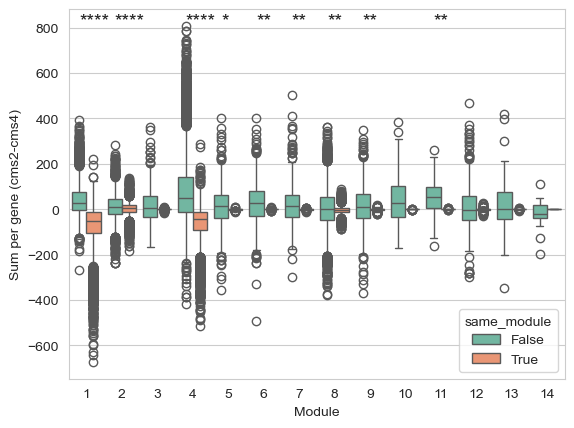

In [68]:
def return_significance(p):
    if p<1e-30:
        return '****'
    elif p<1e-3:
        return '**'
    elif p<1e-2:
        return '*'
    else:
        return('')

# seaborn set color to whitegrid
sns.set_style('whitegrid')

sigs = []
n_bonferroni = len(module_degrees['module_gene'].unique())
print(f'FWER threshold: , {0.05/n_bonferroni}')
df_wilk_genes = pd.DataFrame()
for module, tab in module_degrees[module_degrees['module_gene']<15].groupby('module_gene'):
    stat, p = stats.wilcoxon(tab[tab['same_module']==True]['diff_edge'], tab[tab['same_module']==False]['diff_edge'])
    a = return_significance(p*n_bonferroni)
    sigs.append(a)
    print(f'Module {module},stat:{stat}, p: {p}')
    df_wilk_genes = pd.concat([df_wilk_genes, pd.DataFrame({'module': module, 'stat': stat, 'p': p, 'Bonferroni FWER': np.min([1., p*n_bonferroni]),
                                                        "mean IN-module degree": np.mean(tab[tab['same_module']==True]['diff_edge']),
                                                        "mean OUT-module degree": np.mean(tab[tab['same_module']==False]['diff_edge'])}, index=[0])], axis=0)

sns.boxplot(x='module_gene', y='diff_edge', data=module_degrees[module_degrees['module_gene']<15], hue = 'same_module', palette = 'Set2')
# annotate significance
for i, txt in enumerate(sigs):
    plt.annotate(txt, (i-0.2, np.max(module_degrees[module_degrees['module_gene']<15]['diff_edge'])), fontsize=14)
plt.xlabel('Module')
plt.ylabel('Sum per gene (cms2-cms4)')
plt.show()

In [38]:
df_wilk_genes.module = df_wilk_genes.module.astype('str')

In [69]:
pd.options.display.float_format = None
pd.set_option('display.float_format', '{:.2g}'.format)
print(df_wilk_genes.to_latex(index=False,
                  formatters={"name": str.upper,"stat": "{:.2f}".format, "p": "{:.2E}".format, "Bonferroni FWER": "{:.2E}".format},
))

\begin{tabular}{rrrrrr}
\toprule
module & stat & p & Bonferroni FWER & mean IN-module degree & mean OUT-module degree \\
\midrule
1 & 385813.00 & 0.00E+00 & 0.00E+00 & -78.194178 & 43.655882 \\
2 & 2143764.00 & 1.87E-32 & 5.81E-31 & 2.421301 & 10.373974 \\
3 & 36981.00 & 5.90E-03 & 1.83E-01 & -0.132168 & 13.994770 \\
4 & 1433866.00 & 0.00E+00 & 0.00E+00 & -63.115197 & 89.458204 \\
5 & 98890.00 & 2.12E-04 & 6.58E-03 & 0.165063 & 12.623169 \\
6 & 104579.00 & 2.28E-19 & 7.05E-18 & 0.347839 & 28.194577 \\
7 & 32643.00 & 3.15E-05 & 9.78E-04 & -0.414056 & 21.782637 \\
8 & 2663962.00 & 8.13E-07 & 2.52E-05 & -4.844230 & 2.151773 \\
9 & 218707.00 & 7.61E-07 & 2.36E-05 & -1.094298 & 14.393717 \\
10 & 955.00 & 8.54E-03 & 2.65E-01 & 0.074718 & 39.860753 \\
11 & 869.00 & 1.59E-09 & 4.93E-08 & 0.659262 & 53.029421 \\
12 & 98998.00 & 3.37E-01 & 1.00E+00 & -0.456192 & 9.702970 \\
13 & 9620.00 & 6.20E-02 & 1.00E+00 & -0.154742 & 14.593134 \\
14 & 62.00 & 1.96E-01 & 1.00E+00 & 0.024142 & -20.562472 \\
\

### Now we do the same for TFs (compute degrees and differential degrees)

In [53]:
same_module_degrees = (edge_membership[edge_membership['same_module'] == True]).loc[:,['tf','module_tf','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['tf','module_tf']).sum().reset_index()
same_module_degrees['same_module'] = True
diff_module_degrees = (edge_membership[edge_membership['same_module'] == False]).loc[:,['tf','module_tf','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['tf','module_tf']).sum().reset_index()
diff_module_degrees['same_module'] = False
tf_degrees = pd.concat([same_module_degrees, diff_module_degrees], axis=0)
tf_degrees.sort_values('tf')

tf_degrees['differential_degree'] = tf_degrees['cms2'] - tf_degrees['cms4']


In [54]:
tf_degrees

,tf,module_tf,cms2,cms4,diff_edge,diff_edge_abs,is_edge,same_module,differential_degree
0,ALX1,1,5.6e+03,7.5e+03,-1.8e+03,2e+03,3601,True,-1.8e+03
1,ALX3,2,3.9e+03,3.9e+03,-45,5.4e+02,3351,True,-45
2,ALX4,1,4.7e+03,6.4e+03,-1.6e+03,1.8e+03,3601,True,-1.6e+03
3,AR,2,-1.5e+03,-1.6e+03,82,3.3e+02,3351,True,82
4,ARGFX,2,6.1e+03,6.2e+03,-89,8.7e+02,3351,True,-89
...,...,...,...,...,...,...,...,...,...
992,ZSCAN4,2,-2.2e+03,-2.4e+03,2e+02,4.7e+03,16298,False,2e+02
993,ZSCAN5,4,-3.5e+03,-4.7e+03,1.2e+03,3.1e+03,14829,False,1.2e+03
994,ZSCAN5C,4,-81,1.8e+02,-2.6e+02,2.4e+03,14829,False,-2.6e+02
995,ZSCAN9,1,1.9e+02,-1.2e+03,1.4e+03,5.4e+03,16048,False,1.4e+03


In [58]:
tab[tab['same_module']==True]

,tf,module_tf,cms2,cms4,diff_edge,diff_edge_abs,is_edge,same_module,differential_degree
817,ZNF385D,14,87,87,0.46,2.3,19,True,0.46


FWER threshold: , 0.0035714285714285718
Module 1,stat:40.0, p: 1.0248886991655897e-42
Module 2,stat:7088.0, p: 1.7654741798452378e-12
Module 3,stat:11.0, p: 0.0008392333984375
Module 4,stat:788.0, p: 9.046025939011586e-42
Module 5,stat:207.0, p: 0.83135736733675
Module 6,stat:2.0, p: 1.3969838619232178e-09
Module 7,stat:83.0, p: 0.4304332733154297
Module 8,stat:254.0, p: 1.909507566350996e-06
Module 9,stat:136.0, p: 0.00011535796875250526
Module 10,stat:3.0, p: 1.0
Module 11,stat:0.0, p: 0.03125
Module 12,stat:28.0, p: 0.0006937980651855469
Module 13,stat:0.0, p: 0.015625
Module 14,stat:0.0, p: 1.0


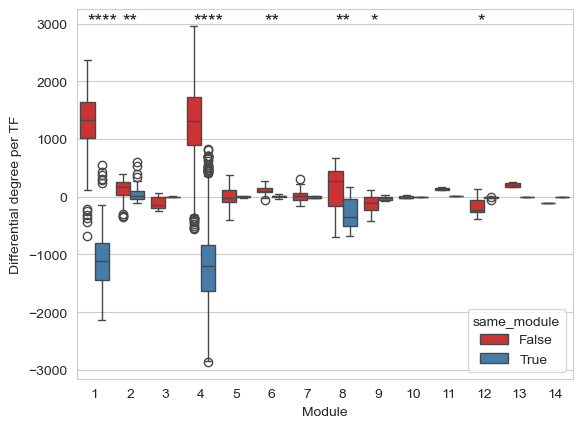

In [61]:
sigs = []
n_bonferroni = len(tf_degrees['module_tf'].unique())
print(f'FWER threshold: , {0.05/n_bonferroni}')
df_wilk_tfs = pd.DataFrame()

for module, tab in tf_degrees[tf_degrees['module_tf']<15].groupby('module_tf'):
    

    stat, p = stats.wilcoxon(tab[tab['same_module']==True]['differential_degree'], tab[tab['same_module']==False]['differential_degree'])
    a = return_significance(p*n_bonferroni)
    sigs.append(a)
    print(f'Module {module},stat:{stat}, p: {p}')
    
    df_wilk_tfs = pd.concat([df_wilk_tfs, pd.DataFrame({'module': module, 
                                                        'stat': stat, 
                                                        'p': p, 
                                                        'Bonferroni FWER': np.min([1., p*n_bonferroni]),
                                                        "mean IN-module degree": np.mean(tab[tab['same_module']==True]['differential_degree']),
                                                        "mean OUT-module degree": np.mean(tab[tab['same_module']==False]['differential_degree'])                                                       
                                                        }, index=[0])], axis=0)


sns.boxplot(x='module_tf', y='differential_degree', data=tf_degrees[tf_degrees['module_tf']<15], hue = 'same_module', palette = 'Set1')
# annotate significance
for i, txt in enumerate(sigs):
    plt.annotate(txt, (i-0.2, np.max(tf_degrees[tf_degrees['module_tf']<15]['differential_degree'])), fontsize=14)
plt.xlabel('Module')
plt.ylabel('Differential degree per TF')
plt.show()

In [62]:
pd.options.display.float_format = None
pd.set_option('display.float_format', '{:.2g}'.format)
print(df_wilk_tfs.to_latex(index=False,
                  formatters={"name": str.upper,"stat": "{:.2f}".format, "p": "{:.2E}".format, "Bonferroni FWER": "{:.2E}".format},
))

\begin{tabular}{rrrrrr}
\toprule
module & stat & p & Bonferroni FWER & mean IN-module degree & mean OUT-module degree \\
\midrule
1 & 40.00 & 1.02E-42 & 1.43E-41 & -1121.821654 & 1331.685448 \\
2 & 7088.00 & 1.77E-12 & 2.47E-11 & 33.390045 & 133.276001 \\
3 & 11.00 & 8.39E-04 & 1.17E-02 & -3.249790 & -110.794156 \\
4 & 788.00 & 9.05E-42 & 1.27E-40 & -1139.382961 & 1268.302363 \\
5 & 207.00 & 8.31E-01 & 1.00E+00 & 3.910279 & -2.354879 \\
6 & 2.00 & 1.40E-09 & 1.96E-08 & 8.815545 & 115.128064 \\
7 & 83.00 & 4.30E-01 & 1.00E+00 & -8.550258 & 13.984968 \\
8 & 254.00 & 1.91E-06 & 2.67E-05 & -282.032701 & 170.765688 \\
9 & 136.00 & 1.15E-04 & 1.62E-03 & -28.205519 & -121.859152 \\
10 & 3.00 & 1.00E+00 & 1.00E+00 & 1.892866 & -2.441624 \\
11 & 0.00 & 3.12E-02 & 4.38E-01 & 11.427210 & 139.448435 \\
12 & 28.00 & 6.94E-04 & 9.71E-03 & -13.333253 & -158.706423 \\
13 & 0.00 & 1.56E-02 & 2.19E-01 & -4.686480 & 206.724260 \\
14 & 0.00 & 1.00E+00 & 1.00E+00 & 0.458702 & -102.928285 \\
\bottomrule
\en

### Check the leading TF by modularity

In [70]:
membership_tf = membership[membership['node_type']=='A']
map_n_tf = membership_tf.loc[:,['module','node_name']].groupby('module').count().rename(columns={'node_name':'n_tf'})
membership_tf = membership_tf.merge(map_n_tf, left_on='module', right_index=True)
membership_tf['raw_modularity'] = membership_tf['modularity'] * membership_tf['n_tf']
membership_tf

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
0,ALX1_A,1,0.0061,ALX1,A,251,1.5
1,ALX3_A,2,0.011,ALX3,A,243,2.7
2,ALX4_A,1,0.0052,ALX4,A,251,1.3
3,AR_A,2,0.0014,AR,A,243,0.35
4,ARGFX_A,2,0.012,ARGFX,A,243,3
...,...,...,...,...,...,...,...
992,ZSCAN4_A,2,0.0026,ZSCAN4,A,243,0.64
993,ZSCAN5_A,4,0.0023,ZSCAN5,A,267,0.61
994,ZSCAN5C_A,4,0.00099,ZSCAN5C,A,267,0.27
995,ZSCAN9_A,1,0.0028,ZSCAN9,A,251,0.7


In [71]:
membership_gene = membership[membership['node_type']=='B']

In [72]:
# Cluster of interest 1,2 4,6,8
membership_tf[membership_tf['module'].isin([1,2,4,6,8])].sort_values(['raw_modularity'], ascending=[False])

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
742,ZNF180_A,4,0.014,ZNF180,A,267,3.7
867,ZNF529_A,4,0.014,ZNF529,A,267,3.7
336,LHX9_A,2,0.015,LHX9,A,243,3.6
335,LHX8_A,2,0.015,LHX8,A,243,3.5
325,LBX1_A,2,0.015,LBX1,A,243,3.5
...,...,...,...,...,...,...,...
675,ZBTB3_A,8,0.0011,ZBTB3,A,59,0.062
89,E2F2_A,6,0.0018,E2F2,A,32,0.056
842,ZNF449_A,8,0.00094,ZNF449,A,59,0.055
398,NFE2_A,8,0.00059,NFE2,A,59,0.035


In [74]:
top_tfs = pd.DataFrame()
for k, tab in membership_tf.groupby('module'):
    print(k)
    # select the first 100 edges based on the first 10 tf modularities and the first 10 gene modularities
    print(tab.sort_values('modularity', ascending=False)['node_name'].values[:10].tolist())
    top_tfs = pd.concat([top_tfs, tab.sort_values('modularity', ascending=False).head(10)], axis=0)

1
['ZNF334', 'FOXD2', 'HMG20B', 'ZNF33B', 'FOXD3', 'POU3F3', 'VSX2', 'ARID5B', 'NR1H4', 'ZNF25']
2
['LHX9', 'LHX8', 'LBX1', 'PBX4', 'DLX6', 'LHX2', 'SHOX2', 'PRRX1', 'PRRX2', 'SHOX']
3
['ARNT', 'ARNT2', 'BHLHE41', 'ARNTL', 'TFE3', 'BHLHE40', 'MLXIPL', 'MLX', 'SREBF2', 'USF1']
4
['ZNF180', 'ZNF529', 'ZNF341', 'ZNF444', 'ZNF467', 'PRDM9', 'ZNF468', 'ZNF304', 'ZNF383', 'ZNF880']
5
['FOSB', 'FOSL2', 'CREB5', 'ATF3', 'CREM', 'ATF2', 'CREB3L4', 'CREB1', 'FOSL1', 'ATF7']
6
['OLIG3', 'OLIG1', 'ATOH7', 'BHLHE23', 'NEUROD2', 'NEUROG1', 'NEUROG2', 'BHLHE22', 'PPARD', 'RXRA']
7
['HEY1', 'HEY2', 'HEYL', 'HES2', 'HES5', 'HES1', 'HES7', 'MYCN', 'HOXD1', 'HOXC8']
8
['ZNF225', 'ZNF487', 'ZNF235', 'ZNF287', 'ZNF443', 'PRDM6', 'ZNF182', 'ZNF496', 'ZNF181', 'ZNF98']
9
['ELK4', 'ELK3', 'ETV4', 'ETV1', 'ETV3', 'ERF', 'GABPA', 'FLI1', 'FEV', 'ELK1']
10
['GLI3', 'GLI1', 'GLI2']
11
['HOXC9', 'HOXB9', 'HOXA11', 'HOXA10', 'HOXD11', 'KDM2B']
12
['KLF6', 'KLF12', 'KLF14', 'KLF2', 'SP3', 'KLF4', 'KLF3', 'SP9', 'KLF

In [75]:
top_tfs[top_tfs['module'].isin([1,2,4])]

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
802,ZNF334_A,1,0.011,ZNF334,A,251,2.7
154,FOXD2_A,1,0.0097,FOXD2,A,251,2.4
233,HMG20B_A,1,0.0095,HMG20B,A,251,2.4
804,ZNF33B_A,1,0.0091,ZNF33B,A,251,2.3
155,FOXD3_A,1,0.0091,FOXD3,A,251,2.3
488,POU3F3_A,1,0.0091,POU3F3,A,251,2.3
659,VSX2_A,1,0.009,VSX2,A,251,2.3
6,ARID5B_A,1,0.0088,ARID5B,A,251,2.2
429,NR1H4_A,1,0.0087,NR1H4,A,251,2.2
766,ZNF25_A,1,0.0086,ZNF25,A,251,2.1


/Users/violafanfani/miniconda3/envs/m1-ml-py10/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


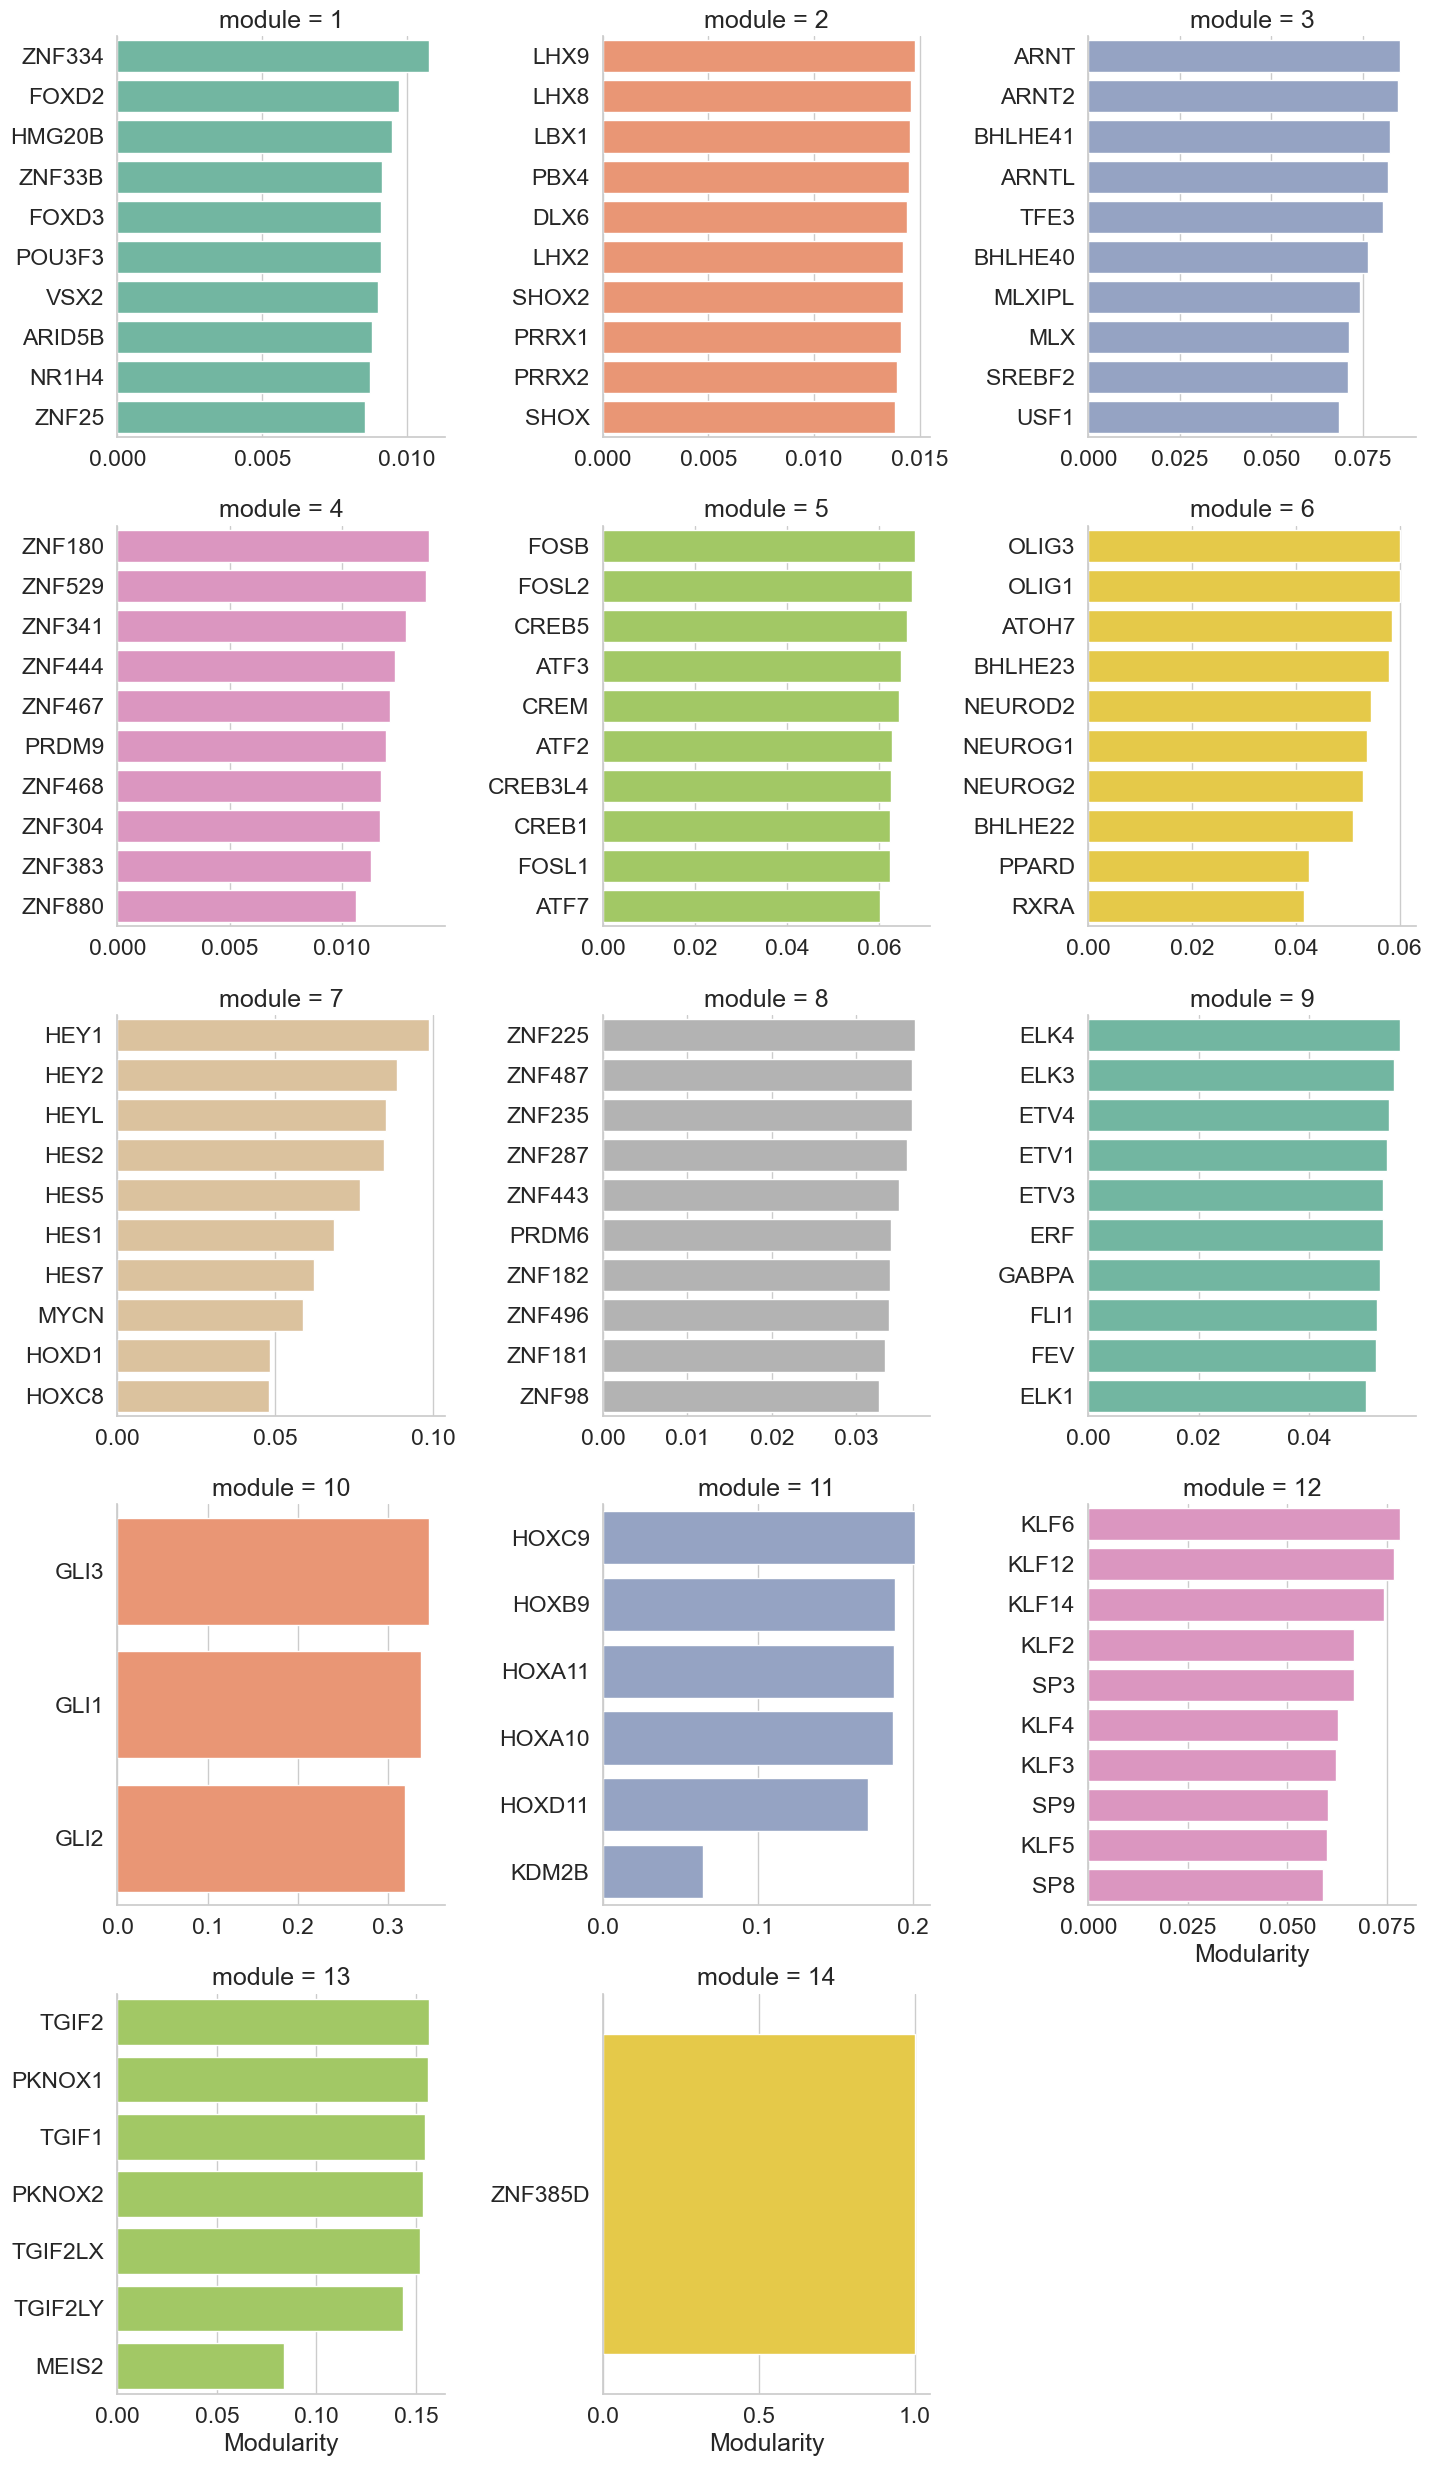

In [98]:
sns.set_context("notebook", font_scale=1.5)
g1 = sns.catplot(col='module', x='modularity', data=top_tfs, y='node_name', palette = 'Set2', hue = 'module', ax = ax, col_wrap=3, height=5, sharey=False, kind = 'bar', legend = False, sharex=False)
g1.set_xlabels('Modularity')
g1.set_ylabels('')
g1.fig.savefig(outputDir + 'top_tfs_modules_all.pdf', dpi=300)

/Users/violafanfani/miniconda3/envs/m1-ml-py10/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


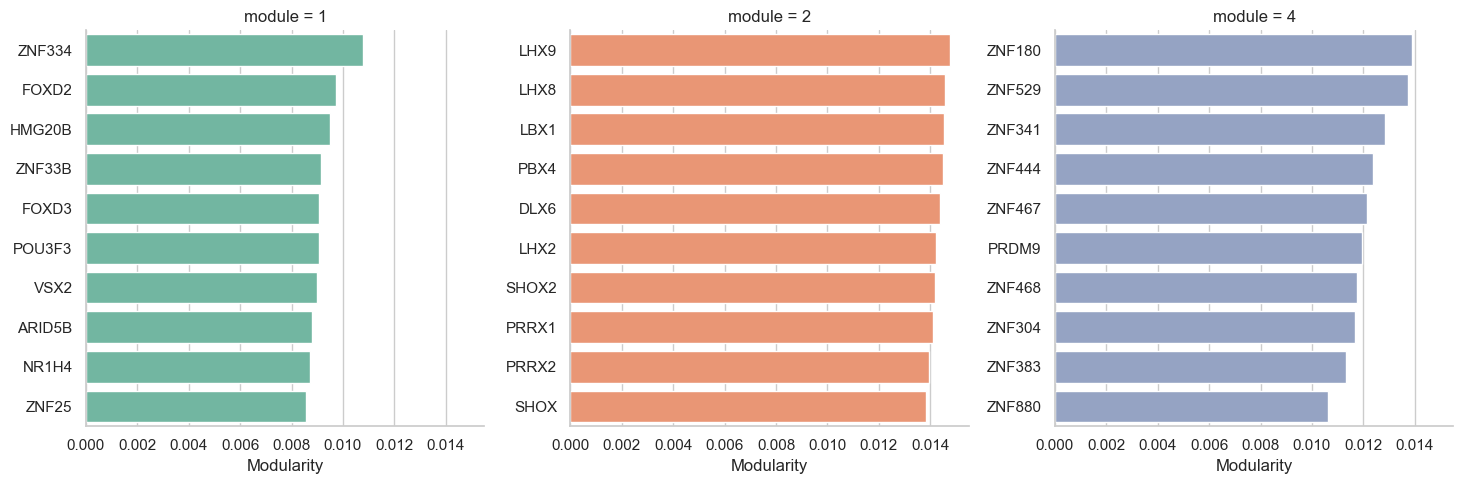

In [94]:
sns.set_context("notebook")
g1 = sns.catplot(col='module', x='modularity', data=top_tfs[top_tfs['module'].isin([1,2,4])], y='node_name', palette = 'Set2', hue = 'module', ax = ax, col_wrap=3, height=5, sharey=False, kind = 'bar', legend = False)
g1.set_xlabels('Modularity')
g1.set_ylabels('')
g1.fig.savefig(outputDir + 'top_tfs_modules_1_2_4.pdf', dpi=300)

## Visualization of the pathway analysis